In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
import seaborn as sns

In [149]:
df=pd.read_csv('Churn_Modelling.csv')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9963 non-null   object 
 6   Age              9949 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9999 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


#### 37 null values in Gender , 51 null values in Age

In [151]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender             37
Age                51
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     1
Exited              0
dtype: int64

## Handling missing values

#### 1. Deleting the columns with missing data

In [152]:
updated_df=df.dropna(axis=1) # not a wise decision in this case because very small amount of values were missing for them we can't loose that much of valuable information

In [153]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RowNumber       10000 non-null  int64  
 1   CustomerId      10000 non-null  int64  
 2   Surname         10000 non-null  object 
 3   CreditScore     10000 non-null  int64  
 4   Geography       10000 non-null  object 
 5   Tenure          10000 non-null  int64  
 6   Balance         10000 non-null  float64
 7   NumOfProducts   10000 non-null  int64  
 8   HasCrCard       10000 non-null  int64  
 9   IsActiveMember  10000 non-null  int64  
 10  Exited          10000 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 859.5+ KB


#### 2. Forward and backward filling

## Feature Scaling

In [154]:
                                                # Person       Height (cm)         Weight (kg)     
                                                #   A	            150                 50 
                                                #   B	            160                 60
                                                #   C	            170                 80
                                                #   D               156                 65

            
# Observation

# Height ranges: 150 → 170

# Weight ranges: 50 → 80

# Height has range 20, weight has range 30
# → Weight varies more → ML models that use distance will give more importance to weight.


# Techniques - 1. Standard Scaler(Standardisation) - used if data is normally distributed

                        # Z-score=(x-mean)/standard deviation 

#              2. Min-Max Scaler(Normalisation) - used if data is not normally distributed 
                        # x_snormalised=(x-min)/(max-min)

## Outlier treatment

### Outliers are the most extremes values in the data. It is an abnormal observations that deviate from the norm. Outliers do not fit in the normal behavior of the data.

### Detect Outliers using following methods -

##### 1. Boxplot
##### 2. Histogram
##### 3. Scatter plot
##### 4. Z-score (3 sigma technique)
##### 5. Inter quartile range(values out of 1.5 time of IQR)

### Handle Outlier using following methods - 

##### 1.Remove the outliers.
##### 2. Replace outlier with suitable values by using following methods :-
#####     . Quantile method
#####     · Inter quartile range
##### 3. Use that ML model which are not sensitive to outliers
##### 4. Like :- KNN, Decision Tree, SVM, Naïve Bayes, Ensemble methods



In [155]:
# 3 sigma technique (Standard Deviation)

# if a data is perfectly normal distributed then it's 99.7 % will lie between the -3 to +3 Standard Deviation and therefore only 0.3 % are outliers but this is ideal case in practical case it's not gonna be like this 

# function to detect outlier

def find_outliers(data):
    outliers=[]
    
    # set upper and lower limit to 3 Standard Deviation

    data_std=statistics.stdev(data) # Standard Deviation of data is stored in data_std
    data_mean=statistics.mean(data)

    outlier_cutoff=data_std*3 # cutoff of 3 Standard Deviation

    lower_limit=data_mean-outlier_cutoff
    upper_limit=data_mean+outlier_cutoff

    # generate outliers

    for i in data:
        if i>upper_limit or i<lower_limit :

            outliers.append(i)

    return outliers


In [ ]:
# salary_outliers=find_outliers(df['EstimatedSalary']) # doesn't return anything that means no outliers can confirm by print(len(salary_outliers))
# salary_outliers
credit_outliers=find_outliers(df['CreditScore'])
len(credit_outliers) # 42
# 42/10000 * 100 = 0.42% outliers which is very good so we don't need to do anything but still for the sake of understanding we will perform operations on it

45

In [157]:
df.CreditScore.skew() # negatively skewed

np.float64(-0.17694508093963926)

<Axes: xlabel='CreditScore', ylabel='Density'>

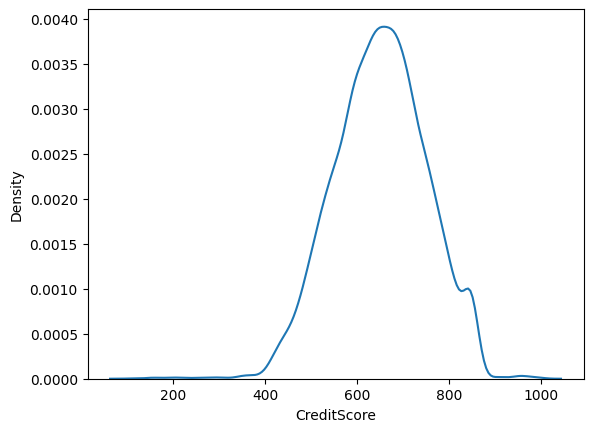

In [158]:
sns.kdeplot(df.CreditScore)

42

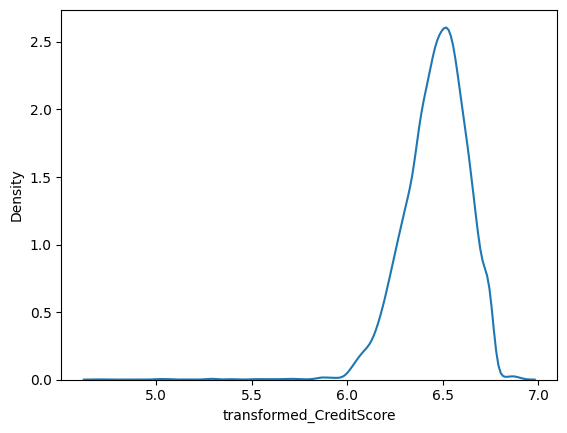

In [ ]:
df['transformed_CreditScore']=np.log(df.CreditScore)
sns.kdeplot(df.transformed_CreditScore)
transformed_CS_outliers=find_outliers(df['transformed_CreditScore'])
len(transformed_CS_outliers) # 42 

<Axes: ylabel='CreditScore'>

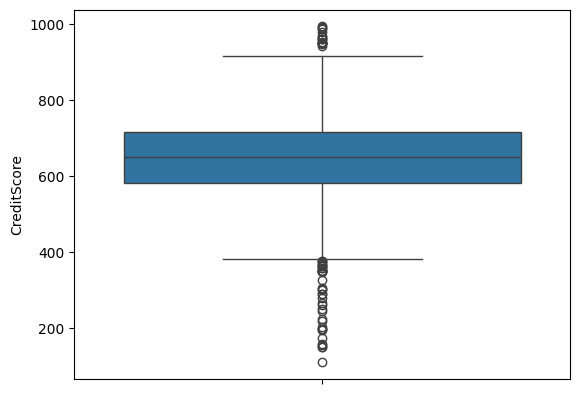

In [ ]:
# Boxplot (Visual way of understanding the data)
# most common 

sns.boxplot(data=df['CreditScore'])

In [ ]:
# IQR(inter quantile range)
# most popular in ML

# Q3-Q1 = 75th percentile - 25th percentile

## Types of data - 
### Qualitative (A variable which is able to describe quality of population)
#####     1. Nominal 
#####     2. Ordinal
### Quantitative (A variable which quantify the population (numerical values))
#####     1. Discrete
#####     2. Continuous

## Types of Analysis - 
#### 1. Univariate Analysis - Uni means 1 therefore your data has only one variable 
#### 2. Bivariate Analysis - Bivariate Analysis can also be performed with numerical values, or a combination of numerical & categorical values . Best way to visualise bivariate data is using scatterplot
#### 3. Multivariate Amnalysis - Data which has more than two variables , you often want to measure the relationship that exists between these features
